In [160]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [6]:
df = pd.read_csv('MovieData/Resources/NameTable.csv')
df.head()

,Name,Year,Movie
0,Henry,1915,The Birth of a Nation
1,Lillian,1915,The Birth of a Nation
2,Mae,1915,The Birth of a Nation
3,Miriam,1915,The Birth of a Nation
4,Elizabeth,1917,Cleopatra


In [7]:
df['Data'] = ""
df.head()

,Name,Year,Movie,Data
0,Henry,1915,The Birth of a Nation,
1,Lillian,1915,The Birth of a Nation,
2,Mae,1915,The Birth of a Nation,
3,Miriam,1915,The Birth of a Nation,
4,Elizabeth,1917,Cleopatra,


In [132]:
for i, row in df.iterrows():
    center = row['Year']
    data = []
    for year in range(center-13,center+11):
        try:
            temp = pd.read_csv('names/yob'+str(year)+'.txt',header=None)
            temp = temp.loc[temp[0]==row['Name']]
            num = temp[2].sum()
            if num == np.nan: num=0
            data.append(num)
        except:
            data.append(0)
    if (sum(data)==0): data = np.nan
    df.at[i,'Data'] = data
    #if(i>3):break
df.head()

,Name,Year,Movie,Data,Data Shift
0,Henry,1915,The Birth of a Nation,"[2168, 1940, 2100, 2145, 2135, 2217, 2310, 243...",0 NaN 1 NaN 2 NaN 3...
1,Lillian,1915,The Birth of a Nation,"[3076, 2984, 3149, 3196, 3307, 3557, 3643, 361...",0 NaN 1 NaN 2 NaN 3...
2,Mae,1915,The Birth of a Nation,"[1270, 1192, 1219, 1294, 1225, 1375, 1392, 124...",0 NaN 1 NaN 2 NaN 3...
3,Miriam,1915,The Birth of a Nation,"[200, 218, 227, 234, 273, 301, 342, 339, 368, ...",0 NaN 1 NaN 2 NaN 3...
4,Elizabeth,1917,Cleopatra,"[3846, 4134, 4336, 4637, 4915, 5189, 5817, 631...",


In [133]:
df.dropna(inplace=True)
df

,Name,Year,Movie,Data,Data Shift
0,Henry,1915,The Birth of a Nation,"[2168, 1940, 2100, 2145, 2135, 2217, 2310, 243...",0 NaN 1 NaN 2 NaN 3...
1,Lillian,1915,The Birth of a Nation,"[3076, 2984, 3149, 3196, 3307, 3557, 3643, 361...",0 NaN 1 NaN 2 NaN 3...
2,Mae,1915,The Birth of a Nation,"[1270, 1192, 1219, 1294, 1225, 1375, 1392, 124...",0 NaN 1 NaN 2 NaN 3...
3,Miriam,1915,The Birth of a Nation,"[200, 218, 227, 234, 273, 301, 342, 339, 368, ...",0 NaN 1 NaN 2 NaN 3...
4,Elizabeth,1917,Cleopatra,"[3846, 4134, 4336, 4637, 4915, 5189, 5817, 631...",
5,Richard,1917,Cleopatra,"[965, 1033, 1092, 1245, 1250, 1434, 1663, 2041...",
6,Rex,1917,Cleopatra,"[33, 46, 61, 48, 64, 68, 65, 82, 164, 243, 334...",
7,Pamela,1917,Cleopatra,"[5, 0, 6, 0, 0, 0, 5, 8, 17, 16, 13, 22, 12, 1...",
8,Cleopatra,1917,Cleopatra,"[5, 5, 8, 11, 13, 5, 17, 17, 16, 13, 20, 17, 1...",
9,Mabel,1918,Mickey,"[2185, 2064, 2080, 2108, 2018, 2133, 2181, 272...",


In [297]:
df['Data Shift'] = ""
running = 1
for i,row in df.iterrows():
    #df.at[i,'Data Shift'] = [100 * (b - a) / a for a, b in zip(row['Data'][::1], row['Data'][1::1])]
    df.at[i,'Data Shift'] = pd.Series(row['Data']).pct_change(running)
    #if (i>2):break


In [298]:
df

,Name,Year,Movie,Data,Data Shift,Spike
0,Henry,1915,The Birth of a Nation,"[2168, 1940, 2100, 2145, 2135, 2217, 2310, 243...",0 NaN 1 -0.105166 2 0.082474 3...,-2
1,Lillian,1915,The Birth of a Nation,"[3076, 2984, 3149, 3196, 3307, 3557, 3643, 361...",0 NaN 1 -0.029909 2 0.055295 3...,1
2,Mae,1915,The Birth of a Nation,"[1270, 1192, 1219, 1294, 1225, 1375, 1392, 124...",0 NaN 1 -0.061417 2 0.022651 3...,-1
3,Miriam,1915,The Birth of a Nation,"[200, 218, 227, 234, 273, 301, 342, 339, 368, ...",0 NaN 1 0.090000 2 0.041284 3...,-2
4,Elizabeth,1917,Cleopatra,"[3846, 4134, 4336, 4637, 4915, 5189, 5817, 631...",0 NaN 1 0.074883 2 0.048863 3...,-1
5,Richard,1917,Cleopatra,"[965, 1033, 1092, 1245, 1250, 1434, 1663, 2041...",0 NaN 1 0.070466 2 0.057115 3...,-2
6,Rex,1917,Cleopatra,"[33, 46, 61, 48, 64, 68, 65, 82, 164, 243, 334...",0 NaN 1 0.393939 2 0.326087 3...,-2
7,Pamela,1917,Cleopatra,"[5, 0, 6, 0, 0, 0, 5, 8, 17, 16, 13, 22, 12, 1...",0 NaN 1 -1.000000 2 inf 3...,1
8,Cleopatra,1917,Cleopatra,"[5, 5, 8, 11, 13, 5, 17, 17, 16, 13, 20, 17, 1...",0 NaN 1 0.000000 2 0.600000 3...,0
9,Mabel,1918,Mickey,"[2185, 2064, 2080, 2108, 2018, 2133, 2181, 272...",0 NaN 1 -0.055378 2 0.007752 3...,-1


[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029]


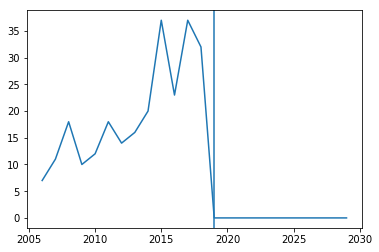

In [299]:
y = 802
x = np.arange(df['Year'][y]-13,df['Year'][y]+11)
print(x)

plt.plot(x,df['Data'][y])
plt.axvline(df['Year'][y])

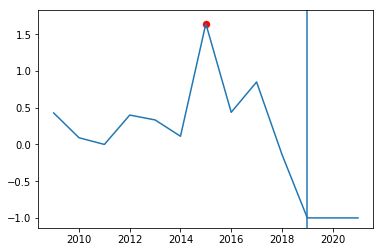

In [272]:
x = np.arange(df['Year'][y]-13,df['Year'][y]+11)
t = np.array(df['Data Shift'][y].tolist())
#print(t)
c_max_index = argrelextrema(t, np.greater, order=5)
plt.plot(x,df['Data Shift'][y])
plt.axvline(df['Year'][y])
plt.scatter(c_max_index[0]+df['Year'][y]-13,t[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [300]:
df['Spike'] = ""

spikeCheck = 1

for i,row in df.iterrows():
    t = np.array(df['Data Shift'][i].tolist())
    #print(t)
    c = argrelextrema(t, np.greater, order=5)
    #print(f"{t}:{c_max_index[0]}")
    x=0
    try:
        #print(len(c[0]))
        if(c[0] < 13):
            if(abs(t[c[0]])<spikeCheck):
                x=-1
            else:
                x=-2
        else:
            if(abs(t[c[0]])<spikeCheck):
                x=1
            else:
                x=2
    except ValueError:
        #print(len(c[0]))
        pass
    df.at[i,'Spike'] = x
    #if(i>2):break

C:\Users\jakeh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]
C:\Users\jakeh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [307]:
strong = df.loc[(df['Spike']==2)|(df['Spike']==-2)]

In [309]:
for i,row in strong.iterrows():
    #if(i>2):break
    x = np.arange(df['Year'][i]-13,df['Year'][i]+11)
    t = np.array(df['Data Shift'][i].tolist())
    #print(t)
    c_max_index = argrelextrema(t, np.greater, order=5)
    plt.plot(x,df['Data Shift'][i])
    plt.xlabel('Year')
    plt.ylabel('Change Value')
    plt.title('Chanve percent of '+df['Name'][i]+" centered on "+df['Movie'][i]+"'s Release'")
    plt.axvline(df['Year'][i])
    plt.scatter(c_max_index[0]+df['Year'][i]-13,t[c_max_index[0]],linewidth=0.3, s=50, c='r')
    title = 'DataCharts/DegreeOfChange/'+str(df['Year'][i])+'_'+df['Name'][i]+'_'+df['Movie'][i].replace(" ","").replace(':','')+'.png'
    #print(title)
    plt.savefig(title)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [310]:
for i,row in strong.iterrows():
    x = np.arange(df['Year'][i]-13,df['Year'][i]+11)
    plt.plot(x,df['Data'][i])
    plt.xlabel('Year')
    plt.ylabel('Count of Name')
    plt.title('Count of '+df['Name'][i]+" centered on "+df['Movie'][i]+"'s Release'")
    plt.axvline(df['Year'][i])
    title = 'DataCharts/NameRate/'+str(df['Year'][i])+'_'+df['Name'][i]+'_'+df['Movie'][i].replace(" ","").replace(':','')+'.png'
    #print(title)
    plt.savefig(title)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [308]:
strong

,Name,Year,Movie,Data,Data Shift,Spike
5,Richard,1917,Cleopatra,"[965, 1033, 1092, 1245, 1250, 1434, 1663, 2041...",0 NaN 1 0.070466 2 0.057115 3...,-2
6,Rex,1917,Cleopatra,"[33, 46, 61, 48, 64, 68, 65, 82, 164, 243, 334...",0 NaN 1 0.393939 2 0.326087 3...,-2
13,Mickey,1918,Mickey,"[0, 11, 15, 7, 19, 29, 24, 29, 35, 52, 70, 71,...",0 NaN 1 inf 2 0.363636 3...,2
19,Richard,1920,Way Down East,"[1245, 1250, 1434, 1663, 2041, 4211, 5129, 669...",0 NaN 1 0.004016 2 0.147200 3...,2
26,Russell,1922,Robin Hood,"[535, 615, 779, 1462, 1958, 2580, 3260, 3353, ...",0 NaN 1 0.149533 2 0.266667 3...,2
29,William,1922,Robin Hood,"[7949, 8881, 10643, 19704, 23632, 29850, 38693...",0 NaN 1 0.117247 2 0.198401 3...,2
39,John,1925,The Big Parade,"[24699, 29451, 38117, 47776, 50270, 52106, 568...",0 NaN 1 0.192396 2 0.294251 3...,2
41,Hobart,1925,The Big Parade,"[25, 38, 36, 86, 88, 100, 133, 89, 122, 136, 1...",0 NaN 1 0.520000 2 -0.052632 3...,2
43,Charlton,1925,Ben-Hur,"[12, 14, 5, 21, 24, 21, 20, 22, 16, 19, 22, 21...",0 NaN 1 0.166667 2 -0.642857 3...,2
44,Jack,1925,Ben-Hur,"[2890, 3557, 4508, 5785, 6205, 6924, 8382, 831...",0 NaN 1 0.230796 2 0.267360 3...,2
